## KNN
is a simple supervised learning used to assign new data point to a given class.

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer, load_boston, fetch_california_housing

In [13]:
iris = load_iris()

In [15]:
iris['target_names'].shape

(3,)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
X = iris['data']
y = iris['target']

In [57]:
knn = KNeighborsClassifier(25)
## n_neighbors --> not how many classes there are, but more of how many neighbours
## each data point for the algorithm to consider.
## Whichever class a point has the most same neighbour, that point will be classed
## as that class.

In [58]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [61]:
y_pred = knn.predict(X)

In [60]:
iris['data'].shape, iris['feature_names']

((150, 4),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

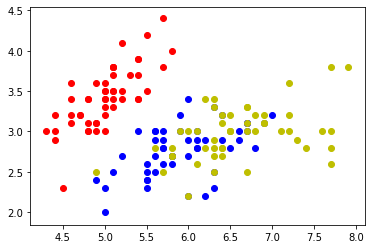

In [56]:
plt.scatter(X[y==0,0], X[y==0,1], c='r')
plt.scatter(X[y==1,0], X[y==1,1], c='b')
plt.scatter(X[y==2,0], X[y==2,1], c='y')
# plt.legend()

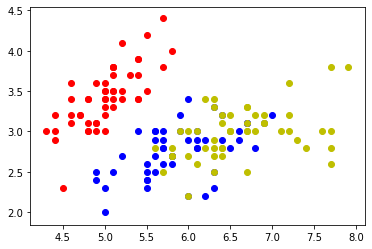

In [62]:
plt.scatter(X[y_pred==0,0], X[y_pred==0,1], c='r')
plt.scatter(X[y_pred==1,0], X[y_pred==1,1], c='b')
plt.scatter(X[y_pred==2,0], X[y_pred==2,1], c='y')
# plt.legend()

In [72]:
from sklearn.metrics import accuracy_score

In [77]:
df_knn_scores = pd.DataFrame(index=['Accuracy'])
for k in range(1, 26):
    knn = KNeighborsClassifier(k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    df_knn_scores[k] = pd.Series({'Accuracy': accuracy_score(y, y_pred)})
#     print (f"K: {k}", knn.score(X, y))
display(df_knn_scores.T) 

,Accuracy
1,1.000000
2,0.980000
3,0.960000
4,0.960000
5,0.966667
6,0.973333
7,0.973333
8,0.980000
9,0.980000
10,0.980000


In [74]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [84]:
df_knn_tts = pd.DataFrame(index=['Accuracy'])
for k in range(1, 26):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    df_knn_tts[k] = pd.Series({'Accuracy': accuracy_score(y_test, y_pred)})
#     print (f"K: {k}", knn.score(X, y))
display(df_knn_tts.T) 

,Accuracy
1,0.92
2,0.90
3,0.92
4,0.90
5,0.90
6,0.90
7,0.94
8,0.88
9,0.90
10,0.90


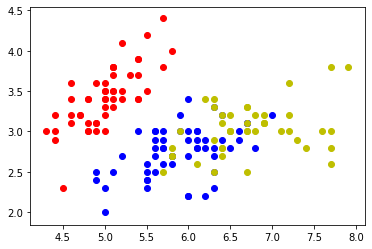

In [85]:
f_pred = knn.predict(X)
plt.scatter(X[f_pred==0,0], X[f_pred==0,1], c='r')
plt.scatter(X[f_pred==1,0], X[f_pred==1,1], c='b')
plt.scatter(X[f_pred==2,0], X[f_pred==2,1], c='y')
# plt.legend()

In [88]:
brca = load_breast_cancer()

In [90]:
brca.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [94]:
brca['target_names'], brca['feature_names']

(array(['malignant', 'benign'], dtype='<U9'),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

In [112]:
X = brca['data']
y = brca['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [113]:
df_brca_tts = pd.DataFrame(index=['Accuracy'])
for k in range(1, 31):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    df_brca_tts[k] = pd.Series({'Accuracy': accuracy_score(y_test, y_pred)})
#     print (f"K: {k}", knn.score(X, y))
display(df_brca_tts.T) 

,Accuracy
1,0.929825
2,0.938596
3,0.947368
4,0.947368
5,0.947368
6,0.947368
7,0.947368
8,0.947368
9,0.956140
10,0.956140


In [114]:
df_brca_tts.T.max()

Accuracy    0.964912
dtype: float64

In [117]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [121]:
X = boston['data']
y = boston['target']

In [123]:
boston['data'].shape

(506, 13)

In [133]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [145]:
df_boston_tts = pd.DataFrame(index=['MSE', 'RMSE', 'R^2'])
for k in range(1, 26):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train, y_train)
    y_pred = knr.predict(X_test)
    df_boston_tts[k] = pd.Series({'MSE': metrics.mean_squared_error(y_test, y_pred),
                                  'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
                                  'R^2': metrics.r2_score(y_test, y_pred)})
#     print (f"K: {k}", knn.score(X, y))
display(df_boston_tts.T) 

,MSE,RMSE,R^2
1,47.612745,6.900199,0.391871
2,39.024020,6.246921,0.501570
3,39.865425,6.313907,0.490823
4,32.715233,5.719723,0.582148
5,35.111910,5.925530,0.551537
6,34.276198,5.854588,0.562211
7,35.350716,5.945647,0.548487
8,37.476817,6.121831,0.521331
9,39.662342,6.297805,0.493417
10,39.819625,6.310279,0.491408


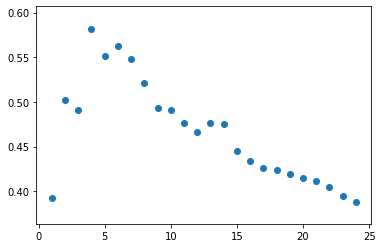

In [144]:
plt.scatter(df_boston_tts.T.index, df_boston_tts.T['R^2'])

In [147]:
CA_housing = fetch_california_housing()

In [148]:
CA_housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [150]:
CA_housing['target'], CA_housing['feature_names']

(array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'])

In [151]:
CA_housing['DESCR']

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [154]:
CA_housing['data'][:5], CA_housing['target'][:5]

(array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
          1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
          3.78800000e+01, -1.22230000e+02],
        [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
          9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
          3.78600000e+01, -1.22220000e+02],
        [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
          1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
          3.78500000e+01, -1.22240000e+02],
        [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
          1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
          3.78500000e+01, -1.22250000e+02],
        [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
          1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
          3.78500000e+01, -1.22250000e+02]]),
 array([4.526, 3.585, 3.521, 3.413, 3.422]))

In [162]:
X = CA_housing['data']
y = CA_housing['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [163]:
df_ca_house = pd.DataFrame(index=['MSE', 'RMSE', 'R^2'])
for k in range(1, 26):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train, y_train)
    y_pred = knr.predict(X_test)
    df_ca_house[k] = pd.Series({'MSE': metrics.mean_squared_error(y_test, y_pred),
                                  'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
                                  'R^2': metrics.r2_score(y_test, y_pred)})
#     print (f"K: {k}", knn.score(X, y))
display(df_ca_house.T) 

,MSE,RMSE,R^2
1,1.627225,1.275627,-0.202991
2,1.286257,1.134133,0.049084
3,1.205431,1.097921,0.108837
4,1.178447,1.085563,0.128786
5,1.148581,1.071719,0.150866
6,1.141597,1.068455,0.156029
7,1.137636,1.066600,0.158957
8,1.133561,1.064688,0.161970
9,1.132123,1.064013,0.163033
10,1.129285,1.062678,0.165131


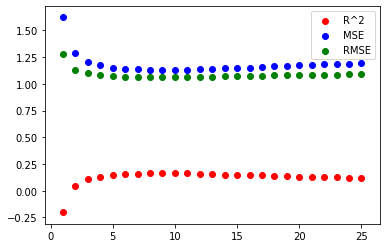

In [168]:
plt.scatter(df_ca_house.T.index, df_ca_house.T['R^2'], c='r', label='R^2')
plt.scatter(df_ca_house.T.index, df_ca_house.T['MSE'], c='b', label='MSE')
plt.scatter(df_ca_house.T.index, df_ca_house.T['RMSE'], c='g', label='RMSE')
plt.legend()